# Usage of GBOD Functions

In [118]:
%matplotlib notebook

%load_ext autoreload
%autoreload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import OutlierDetection as od

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Read the dataset `df` from original combine harvester with machineId 903

In [151]:
# set the dataset path
inputPath = "D:/project/agata/data/olddata/"
inputFile = inputPath+"58900903_telematics_agata_v3__final.csv"

# read the dataset and drop the missing value
df_full = pd.read_csv(inputFile)
df_full.head()
#df_full.columns # List all the columns

mtyp    serial        mid                 time   gps_lat  gps_long  \
0  LEXION 600  58900903  119802463  2010-03-09T08:51:34   0.00000   0.00000   
1  LEXION 600  58900903  119802463  2010-07-06T08:51:49   0.00000   0.00000   
2  LEXION 600  58900903  119802463  2010-07-06T15:40:20   0.00000   0.00000   
3  LEXION 600  58900903  119802463  2010-07-06T15:40:35  54.10291  12.63763   
4  LEXION 600  58900903  119802463  2010-07-06T15:40:50  54.10300  12.63743   

   gps_height  empfindlichkeit_siebe  fruchtart  dieselfuellstand  \
0         0.0                    1.0        3.0              98.0   
1         0.0                    1.0        3.0              98.0   
2         0.0                    1.0        3.0              98.0   
3         0.0                    1.0        3.0              98.0   
4         0.0                    1.0        3.0              98.0   

       ...       verluste_siebe  verluste_abscheidung  bearbeitete_flaeche  \
0      ...                  NaN                   NaN                  NaN   
1      ...                  NaN                   NaN                  NaN   
2      ...                  NaN                   NaN                  NaN   
3      ...                  NaN                   NaN                  NaN   
4      ...                  NaN                   NaN                  NaN   

   ertrag  kornfeuchte  feuchtemittelwert  korntank_70  motorauslastung  \
0     NaN          NaN                NaN          NaN              NaN   
1     NaN          NaN                NaN          NaN              NaN   
2     NaN          NaN                NaN          NaN              NaN   
3     NaN          NaN                NaN          NaN              NaN   
4     NaN          NaN                NaN          NaN              NaN   

   korntankentleerung  korntank_100  
0                 NaN           NaN  
1                 NaN           NaN  
2                 NaN           NaN  
3                 NaN           NaN  
4                 NaN           NaN  

[5 rows x 45 columns]

In [120]:
df = df_full[["ertrag","durchsatz"]].dropna()

# show the head of the input dataset
df.head()

ertrag  durchsatz
411   6.410      4.886
412   9.281     25.461
413  10.590     27.051
414   9.941     29.741
415  10.444     32.830

In [121]:
df_full.columns

Index([u'mtyp', u'serial', u'mid', u'time', u'gps_lat', u'gps_long',
       u'gps_height', u'empfindlichkeit_siebe', u'fruchtart',
       u'dieselfuellstand', u'querneigung', u'maschinennummer',
       u'obersiebposition', u'spezifisches_fruchtgewicht', u'betriebsstunde',
       u'untersiebposition', u'teilbreitenstufenanzahl',
       u'empfindlichkeit_abscheidung', u'laengenneigung', u'absenkautomatik',
       u'korbposition', u'motordrehzahl', u'fahrgeschwindigkeit',
       u'schnitthoehe', u'haecksler', u'dreschtrommel_an___aus',
       u'geblaesedrehzahl', u'ueberkehrdrehzahl', u'dreschtrommeldrehzahl',
       u'rotor____schuettlerdrehzahl', u'durchsatz',
       u'haspelumfangsgeschwindigkeit', u'arbeitsposition', u'tischposition',
       u'flaechenleistung', u'verluste_siebe', u'verluste_abscheidung',
       u'bearbeitete_flaeche', u'ertrag', u'kornfeuchte', u'feuchtemittelwert',
       u'korntank_70', u'motorauslastung', u'korntankentleerung',
       u'korntank_100'],
      dtype

## 2. Usage Examples

### 2.1 Set the parameter and initialize a GBOD Object

In [122]:
n_partition = 20 # number of partition in each attribute
outlier_percent = 0.5 # percent of outliers
myGBOD = od.GBOD(df, n_partition=n_partition,outlier_percent=outlier_percent) # create the GBOD object

### 2.2 use the functions

In [123]:
# run the function `run_GBOD()` to get the result. 
result, grid_info = myGBOD.run_GBOD()

n_outlier_grids =  76


In [124]:
# result is the dataframe with all the information of the points.
result.head()

ertrag  durchsatz  ertrag_norm  durchsatz_norm  ertrag_partition  \
411   6.410      4.886     8.545903        1.070943                 8   
412   9.281     25.461    12.374158        5.581620                12   
413  10.590     27.051    14.119608        5.930197                14   
414   9.941     29.741    13.254217        6.519928                13   
415  10.444     32.830    13.924928        7.197132                13   

     durchsatz_partition pred_grid_label  
411                    1              no  
412                    5              no  
413                    5              no  
414                    6              no  
415                    7              no

In [125]:
# `grid_info` is a dataframe with all grid information
grid_info.head()

ertrag_partition  durchsatz_partition  points  cum_sum pred_grid_label
0                 8                   18       1        1             yes
1                 3                   15       1        2             yes
2                 4                   15       1        3             yes
3                 4                   17       1        4             yes
4                 6                   17       1        5             yes

In [126]:
# You can also set the different percent of outliers and write down the result as txt file
result, grid_info = myGBOD.run_GBOD(outlier_percent=0.25, writeCSV=True)

n_outlier_grids =  56


### 2.3 Use the center_bias function

**Center Bias** means the difference between `point center` and `grid center`

In [127]:
result_cb, grid_info_cb = myGBOD.run_GBOD_center_bias(outlier_grid_frac=0.5)
result_cb.head()

outlier_gird_frac = 0.5


ertrag  durchsatz  ertrag_norm  durchsatz_norm  ertrag_partition  \
411   6.410      4.886     8.545903        1.070943                 8   
412   9.281     25.461    12.374158        5.581620                12   
413  10.590     27.051    14.119608        5.930197                14   
414   9.941     29.741    13.254217        6.519928                13   
415  10.444     32.830    13.924928        7.197132                13   

     durchsatz_partition center_bias_label  
411                    1                no  
412                    5                no  
413                    5               yes  
414                    6                no  
415                    7                no

In [128]:
grid_info_cb.head()

ertrag_center  durchsatz_center  \
ertrag_partition durchsatz_partition                                    
2                14                           2.227            64.078   
13               18                           9.783            82.903   
3                15                           2.733            68.441   
17               19                          12.755            89.391   
4                17                           3.053            80.709   

                                      ertrag_norm_center  \
ertrag_partition durchsatz_partition                       
2                14                             2.968198   
13               18                            13.043536   
3                15                             3.642910   
17               19                            17.006467   
4                17                             4.069605   

                                      durchsatz_norm_center  \
ertrag_partition durchsatz_partition                          
2                14                               14.047661   
13               18                               18.174683   
3                15                               15.004165   
17               19                               19.597054   
4                17                               17.693691   

                                      ertrag_partition_center  \
ertrag_partition durchsatz_partition                            
2                14                                       2.5   
13               18                                      13.5   
3                15                                       3.5   
17               19                                      17.5   
4                17                                       4.5   

                                      durchsatz_partition_center  center_diff  \
ertrag_partition durchsatz_partition                                            
2                14                                         14.5     0.651015   
13               18                                         18.5     0.560527   
3                15                                         15.5     0.516019   
17               19                                         19.5     0.502985   
4                17                                         17.5     0.471971   

                                     center_bias_label  
ertrag_partition durchsatz_partition                    
2                14                                yes  
13               18                                yes  
3                15                                yes  
17               19                                yes  
4                17                                yes

### 2.4 Plot

<IPython.core.display.Javascript object>


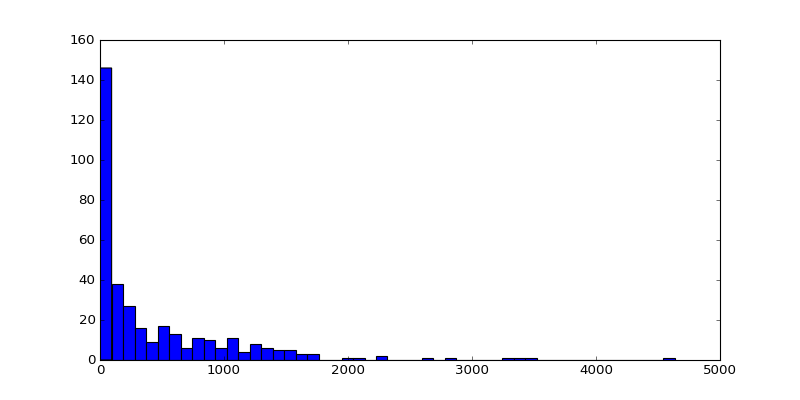

In [129]:
# Plot the  histogram about number of points in each grid
myGBOD.plotGridHist(bins = 50)

In [130]:
myGBOD.np_in_grid.max()

4636

<IPython.core.display.Javascript object>


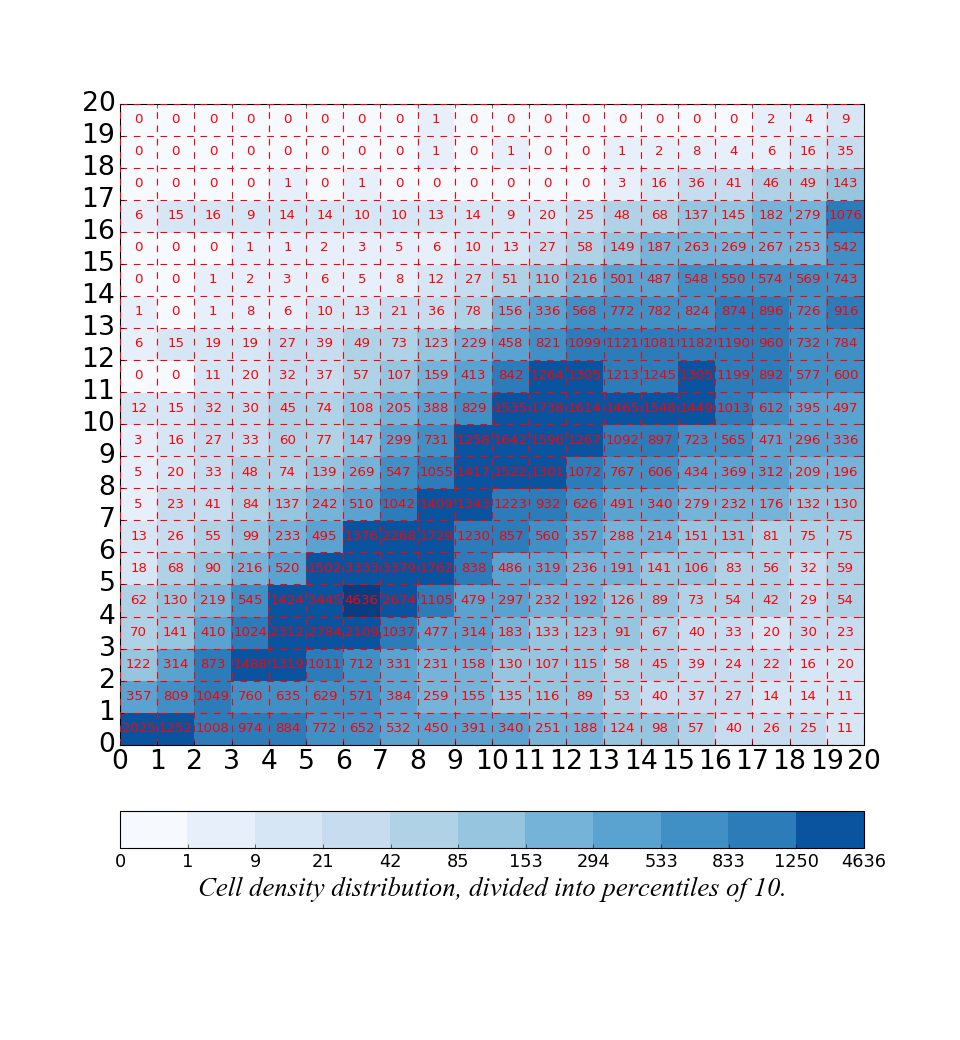

In [131]:
# Plot the heatmap
myGBOD.plotGridHeatMap(fontsize=12)

n_outlier_grids =  56


<IPython.core.display.Javascript object>


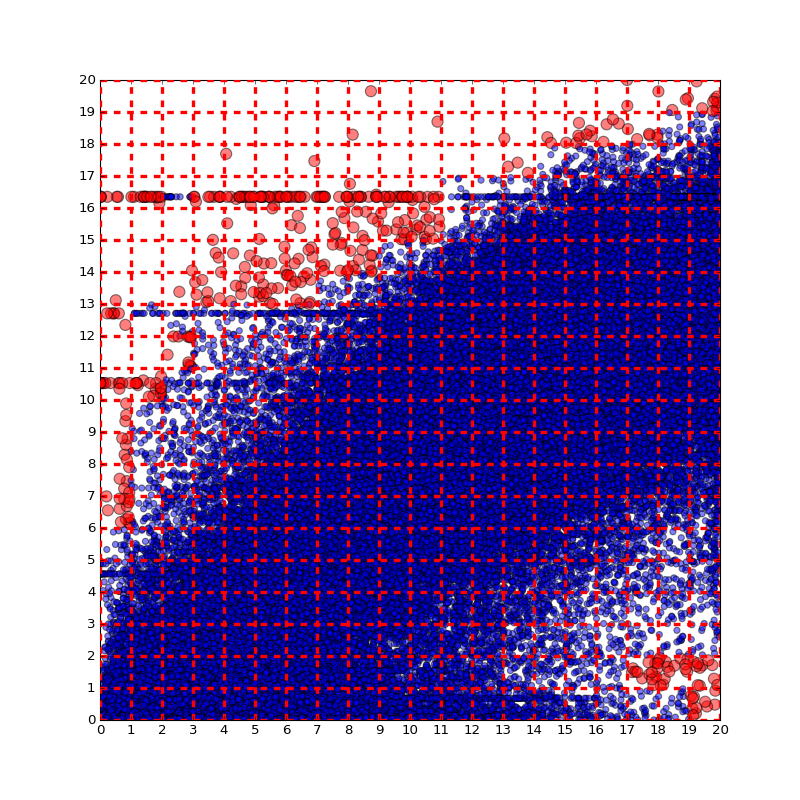

n_outlier_grids =  56


<IPython.core.display.Javascript object>


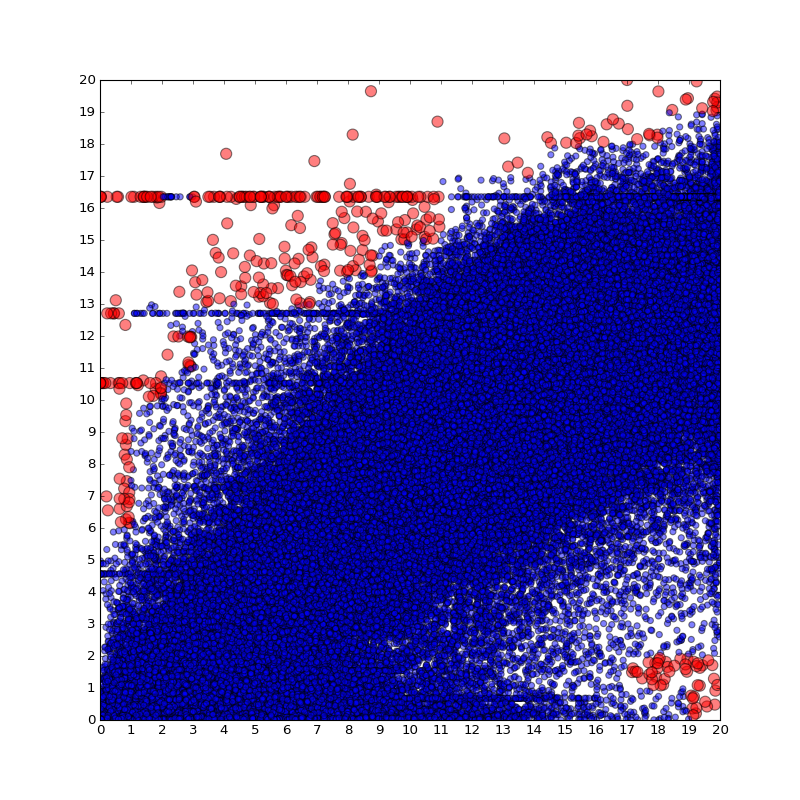

In [132]:
# plot the points with different outlier_percent
myGBOD.plotOutliers()
myGBOD.plotOutliers(grid=False)

n_outlier_grids =  76


<IPython.core.display.Javascript object>


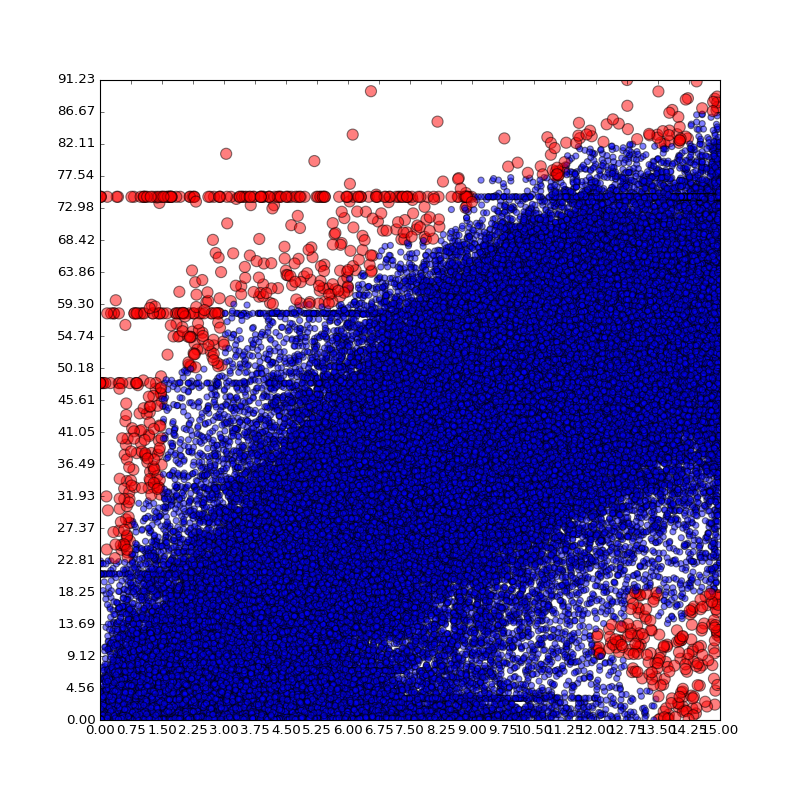

In [133]:
# plot the points in original dataset
myGBOD.plotOutliers_origin(outlier_percent=0.5, grid=False)

<IPython.core.display.Javascript object>


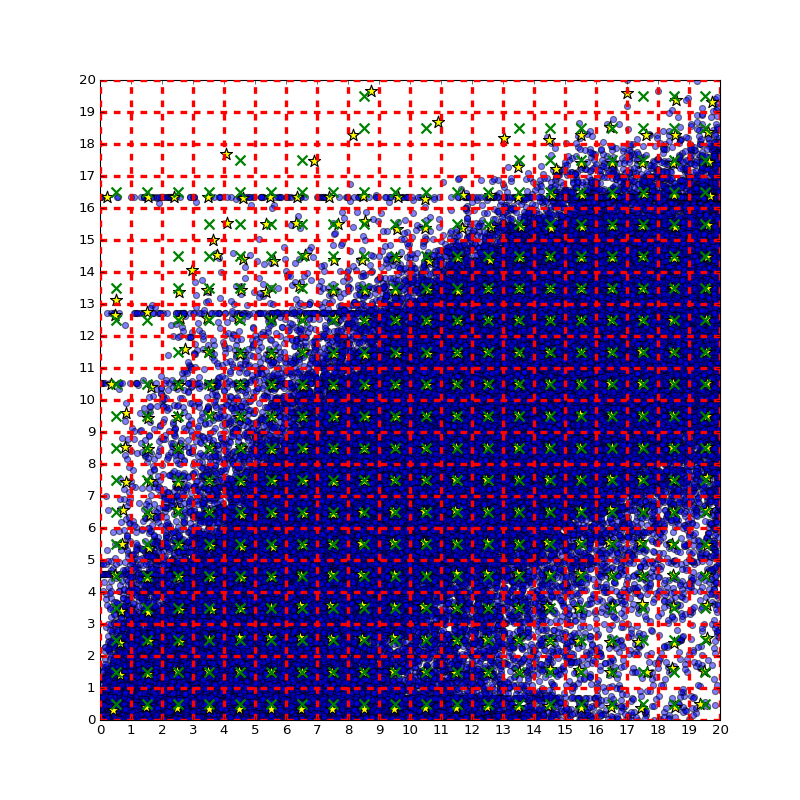

In [134]:
#plot the normed dataset with point center for each grid
myGBOD.plot_df_norm()

outlier_percent = 0.5
outlier_gird_frac = 0.214689265537


<IPython.core.display.Javascript object>


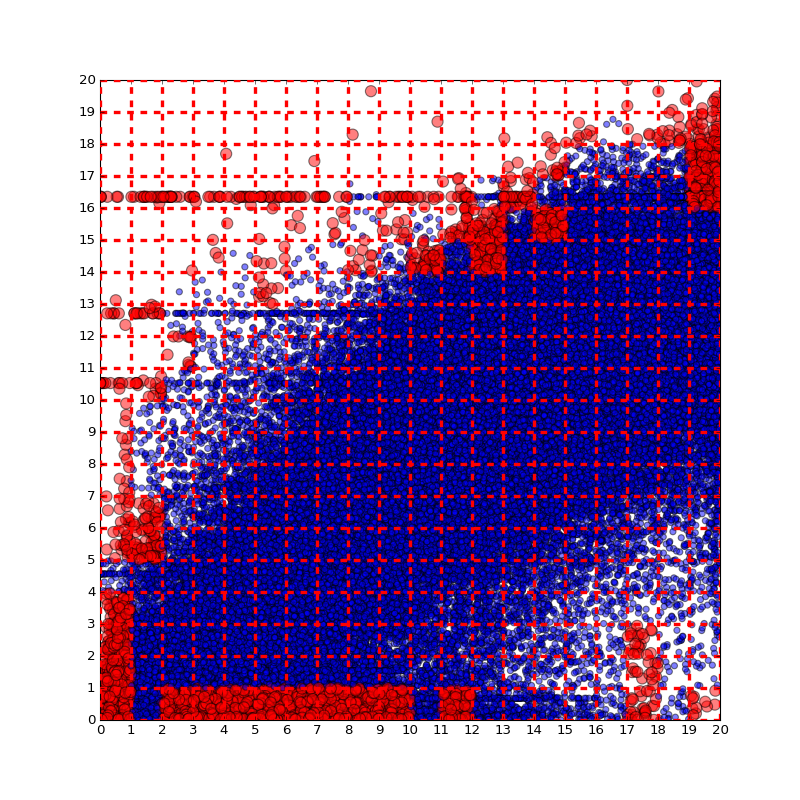

In [135]:
# plot the outliers after center bias method with different outlier_grid_frac
myGBOD.plotOutliers_CenterBias()

## 3. Other Examples

### 3.1 Sample a part of records from a dataset

Sample a given number of records

In [136]:
# Sample 4000 records from df
mySample = od.sample_df(df, n=4000, random_state=1)
mySample.head()

ertrag  durchsatz
432  10.309     37.919
482   8.868     31.961
580  10.817     53.247
651   9.967     55.920
682  10.915     47.734

In [137]:
# Sample 1% records from df
mySample = od.sample_df(df, frac=0.01, random_state=1)
mySample.head()

ertrag  durchsatz
765   10.576     48.424
1351   9.278     38.177
1436   9.535     42.373
1570  12.179     53.265
1627  13.235     45.866

### 3.2 Sample 7000 records from df and run gbod

In [138]:
# sample 7000 records from df
df7000=od.sample_df(df, n=7000, random_state=1)

# initialize the GBOD Object with 15 partition on each attribute.
myGBOD2 = od.GBOD(df7000, n_partition=20, outlier_percent=1)

# get result
result,grid_info = myGBOD2.run_GBOD()
result.head()

n_outlier_grids =  54


ertrag  durchsatz  ertrag_norm  durchsatz_norm  ertrag_partition  \
432  10.309     37.919    13.745833        9.135106                13   
435  10.498     36.088    13.997866        8.693987                13   
482   8.868     31.961    11.824243        7.699721                11   
565  11.141     50.216    14.855314       12.097668                14   
573  11.300     51.061    15.067342       12.301243                15   

     durchsatz_partition pred_grid_label  
432                    9              no  
435                    8              no  
482                    7              no  
565                   12              no  
573                   12              no

In [139]:
# get the third and fourth column for the normalized dataset
myGBOD2.res.loc[:, ["ertrag_norm", "durchsatz_norm"]].head()

ertrag_norm  durchsatz_norm
432    13.745833        9.135106
435    13.997866        8.693987
482    11.824243        7.699721
565    14.855314       12.097668
573    15.067342       12.301243

In [140]:
myGBOD2.np_in_grid.nlargest()

ertrag_partition  durchsatz_partition
6                 5                      191
                  4                      168
7                 5                      128
5                 4                      120
7                 6                      113
dtype: int64

n_outlier_grids =  54


<IPython.core.display.Javascript object>


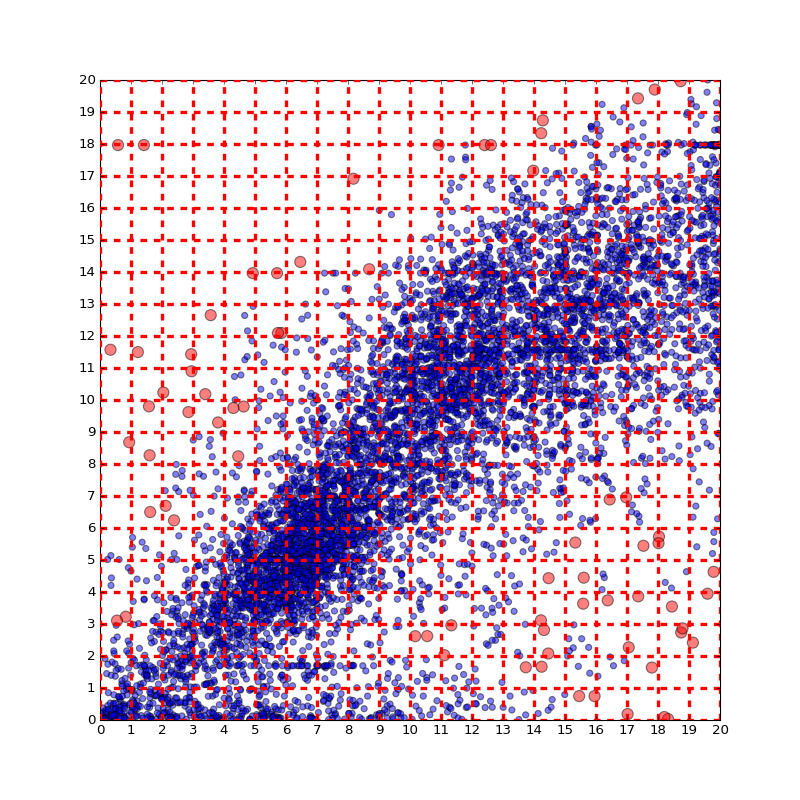

n_outlier_grids =  54


<IPython.core.display.Javascript object>


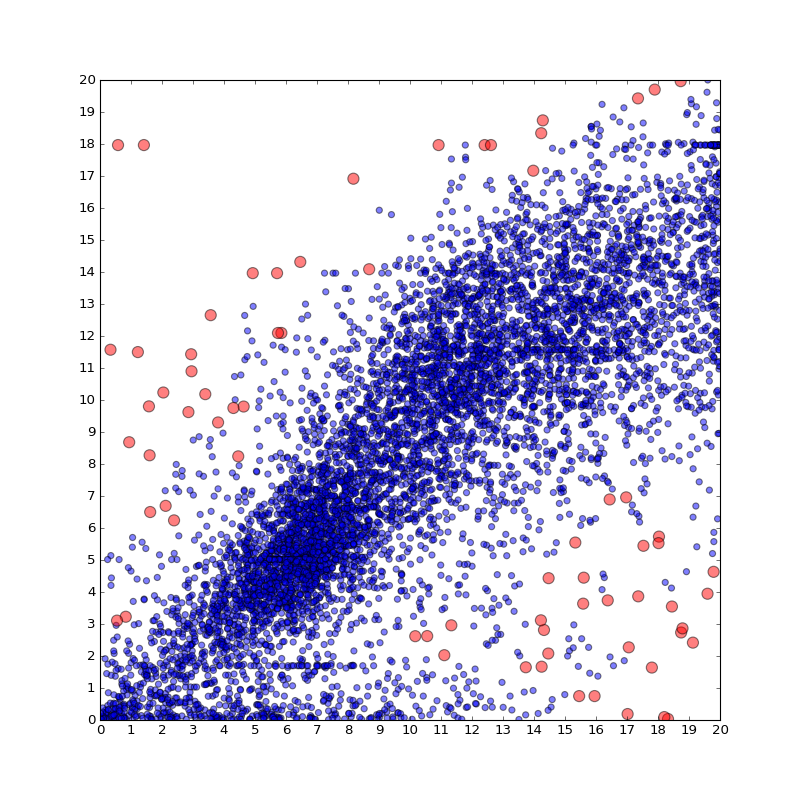

In [141]:
# plot the result
myGBOD2.plotOutliers()

# plot the result with grid
myGBOD2.plotOutliers(grid=False)

<IPython.core.display.Javascript object>


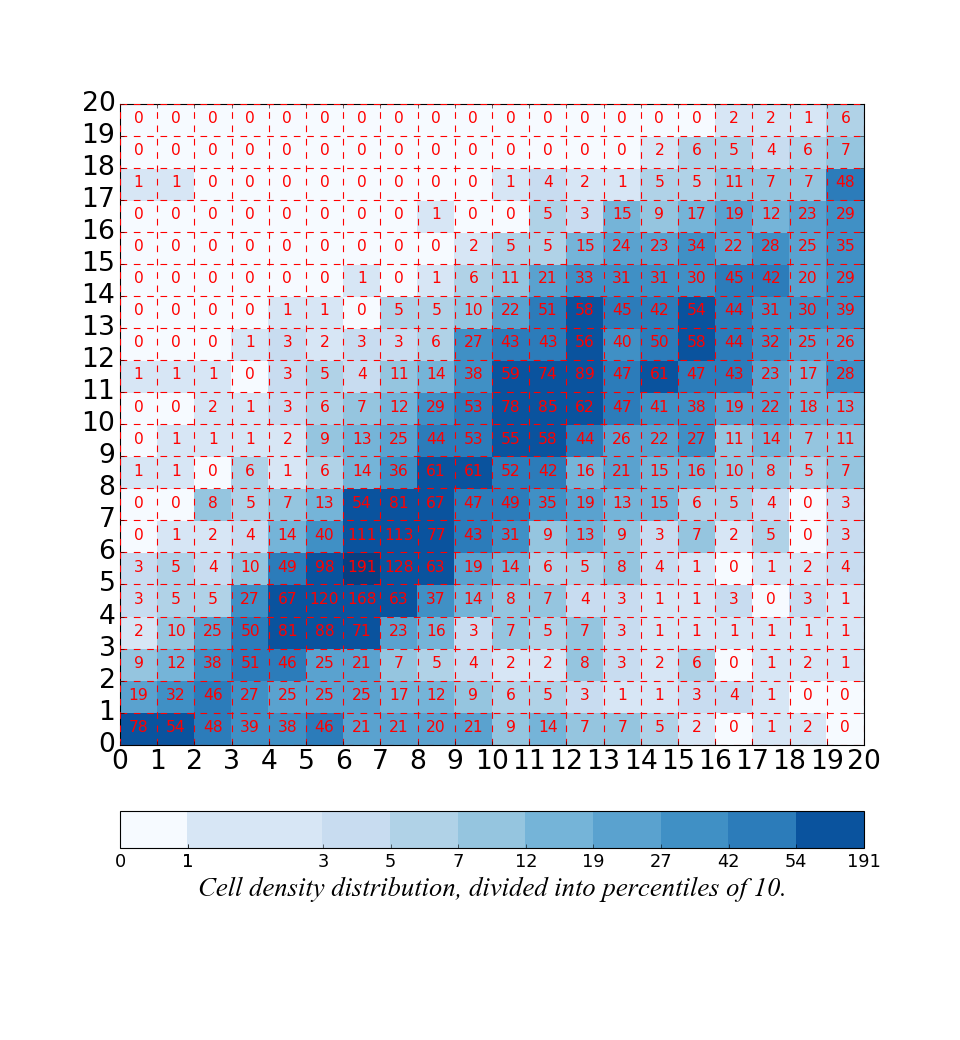

In [142]:
myGBOD2.plotGridHeatMap(fontsize=14)

### 3.3 KDTree-KNN Example

In [143]:
mySample=od.sample_df(df, n=10000, random_state=1)

In [144]:
myKDKNN = od.KDKNN(mySample, k=5)

In [145]:
myKDKNN.run_KDKNN(outlier_percent=1).head()

ertrag  durchsatz  ertrag_norm  durchsatz_norm     score label
412   9.281     25.461     6.187492        2.790810  0.121963    no
430   9.865     37.547     6.576877        4.115622  0.042097    no
432  10.309     37.919     6.872916        4.156399  0.103942    no
435  10.498     36.088     6.998933        3.955693  0.062281    no
482   8.868     31.961     5.912122        3.503310  0.067544    no

<IPython.core.display.Javascript object>


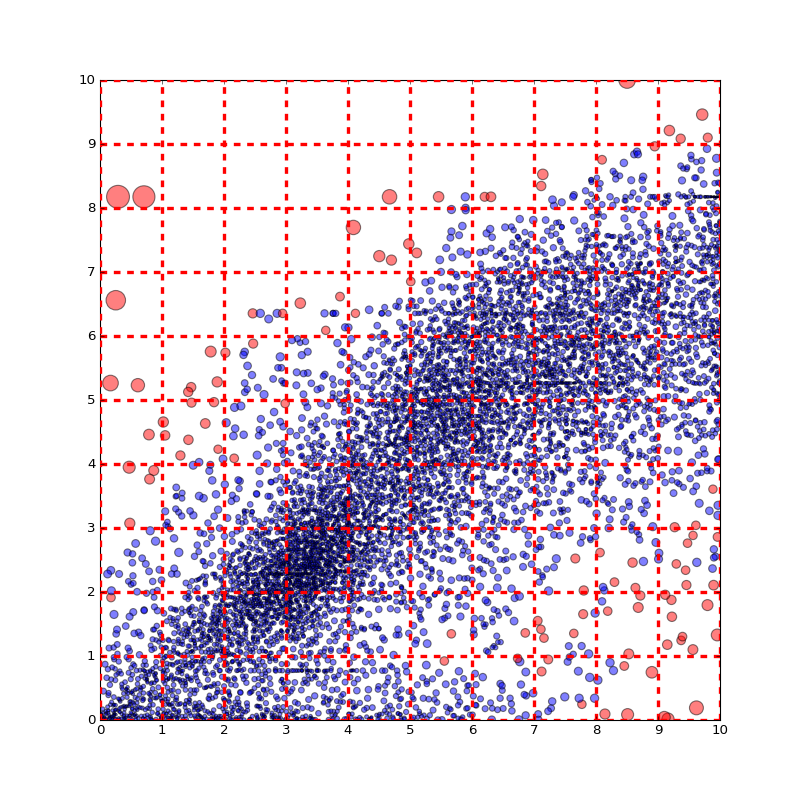

In [146]:
myKDKNN.plot_outliers(grid=True, outlier_percent=1)

### 3.4 GBOD vergleich mit KDKNN

#### Create GBOD3

In [147]:
myGBOD3 = od.GBOD(mySample, n_partition=20, outlier_percent=5)

#### Vergleich mit KDKNN mit function `compare_KNKNN(outlier_percent)`

In [148]:
myGBOD3.compare_KDKNN()

n_outlier_grids =  124


{'F1': 0.7524950099800398, 'precision': 0.750996015936255, 'recall': 0.754}

In [149]:
myGBOD3.compare_KDKNN(outlier_percent=2)

n_outlier_grids =  84


{'F1': 0.7111111111111111, 'precision': 0.7024390243902439, 'recall': 0.72}

### 3.5 measure the time

#### GBOD

In [161]:
%timeit myGBOD.findPartition()

10 loops, best of 3: 75.9 ms per loop


#### KDKNN

In [158]:
%timeit od.get_KDKNN_score(df)

1 loops, best of 3: 11.9 s per loop
